# 例：ベータ函数と二項分布の関係とその応用

* 黒木玄
* 2022-05-27～2022-06-08

$
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
\newcommand\T[1]{T_{(#1)}}
\newcommand\bk{\bar\kappa}
\newcommand\X{{\mathscr X}}
\newcommand\CP{{\mathrm{CP}}}
\newcommand\Sterne{{\mathrm{Stern}}}
\newcommand\Wilson{{\mathrm{Wilson}}}
\newcommand\Wald{{\mathrm{Wald}}}
\newcommand\LLR{{\mathrm{LLR}}}
\newcommand\pdf{\op{pdf}}
\newcommand\pmf{\op{pmf}}
\newcommand\cdf{\op{cdf}}
\newcommand\quantile{\op{quantile}}
\newcommand\Binomial{\op{Binomial}}
\newcommand\Beta{\op{Beta}}
\newcommand\Normal{\op{Normal}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
\newcommand\phat{\hat{p}}
\newcommand\SE{\op{SE}}
\newcommand\SEhat{\widehat{\SE}}
$

このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートに書いてある式を文字通りにそのまま読んで正しいと思ってしまうとひどい目に会う可能性が高い. しかし, 数が使われている文献には大抵の場合に文字通りに読むと間違っている式や主張が書いてあるので, 内容を理解した上で訂正しながら読んで利用しなければいけない. 実践的に数学を使う状況では他人が書いた式をそのまま信じていけない.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ベータ分布と二項分布の累積分布函数の関係" data-toc-modified-id="ベータ分布と二項分布の累積分布函数の関係-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ベータ分布と二項分布の累積分布函数の関係</a></span><ul class="toc-item"><li><span><a href="#ベータ分布と二項分布の累積分布函数の関係の証明" data-toc-modified-id="ベータ分布と二項分布の累積分布函数の関係の証明-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ベータ分布と二項分布の累積分布函数の関係の証明</a></span></li><li><span><a href="#基本特殊函数ライブラリを使うと効率的に計算できる" data-toc-modified-id="基本特殊函数ライブラリを使うと効率的に計算できる-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>基本特殊函数ライブラリを使うと効率的に計算できる</a></span></li><li><span><a href="#ベータ分布と二項分布の累積分布函数の関係の別証明" data-toc-modified-id="ベータ分布と二項分布の累積分布函数の関係の別証明-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>ベータ分布と二項分布の累積分布函数の関係の別証明</a></span></li><li><span><a href="#累積分布函数と分位点函数について" data-toc-modified-id="累積分布函数と分位点函数について-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>累積分布函数と分位点函数について</a></span></li><li><span><a href="#パラメータに関する区間推定での利用の仕方" data-toc-modified-id="パラメータに関する区間推定での利用の仕方-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>パラメータに関する区間推定での利用の仕方</a></span></li><li><span><a href="#まとめ" data-toc-modified-id="まとめ-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>まとめ</a></span></li></ul></li><li><span><a href="#二項分布モデルでのClopper-Pearsonの信頼区間" data-toc-modified-id="二項分布モデルでのClopper-Pearsonの信頼区間-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>二項分布モデルでのClopper-Pearsonの信頼区間</a></span><ul class="toc-item"><li><span><a href="#Clopper-Pearsonの信頼区間の定義" data-toc-modified-id="Clopper-Pearsonの信頼区間の定義-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Clopper-Pearsonの信頼区間の定義</a></span></li><li><span><a href="#問題:-n=100,-k=30-の95%Clopper-Pearson信頼区間" data-toc-modified-id="問題:-n=100,-k=30-の95%Clopper-Pearson信頼区間-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>問題: n=100, k=30 の95%Clopper-Pearson信頼区間</a></span></li><li><span><a href="#問題:-n=400,-k=120-の95%-Clopper-Pearson信頼区間" data-toc-modified-id="問題:-n=400,-k=120-の95%-Clopper-Pearson信頼区間-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>問題: n=400, k=120 の95% Clopper-Pearson信頼区間</a></span></li></ul></li><li><span><a href="#関連の問題" data-toc-modified-id="関連の問題-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>関連の問題</a></span><ul class="toc-item"><li><span><a href="#問題:-Waldの信頼区間との比較" data-toc-modified-id="問題:-Waldの信頼区間との比較-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>問題: Waldの信頼区間との比較</a></span></li><li><span><a href="#Waldの信頼区間の基礎" data-toc-modified-id="Waldの信頼区間の基礎-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Waldの信頼区間の基礎</a></span></li><li><span><a href="#問題:-Waldの信頼区間が0～1の範囲をはみ出す場合" data-toc-modified-id="問題:-Waldの信頼区間が0～1の範囲をはみ出す場合-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>問題: Waldの信頼区間が0～1の範囲をはみ出す場合</a></span></li><li><span><a href="#問題:-Wilsonの信頼区間との比較" data-toc-modified-id="問題:-Wilsonの信頼区間との比較-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>問題: Wilsonの信頼区間との比較</a></span></li><li><span><a href="#Wilsonの信頼区間の基礎" data-toc-modified-id="Wilsonの信頼区間の基礎-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Wilsonの信頼区間の基礎</a></span></li><li><span><a href="#Sterneの信頼区間について" data-toc-modified-id="Sterneの信頼区間について-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Sterneの信頼区間について</a></span></li><li><span><a href="#問題:-Poisson分布とガンマ分布の関係" data-toc-modified-id="問題:-Poisson分布とガンマ分布の関係-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>問題: Poisson分布とガンマ分布の関係</a></span></li></ul></li><li><span><a href="#おまけ:-二項分布モデルのBayes統計との関係" data-toc-modified-id="おまけ:-二項分布モデルのBayes統計との関係-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>おまけ: 二項分布モデルのBayes統計との関係</a></span><ul class="toc-item"><li><span><a href="#二項分布モデルのBayes統計" data-toc-modified-id="二項分布モデルのBayes統計-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>二項分布モデルのBayes統計</a></span></li><li><span><a href="#事前分布が共役事前分布(ベータ分布)の場合" data-toc-modified-id="事前分布が共役事前分布(ベータ分布)の場合-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>事前分布が共役事前分布(ベータ分布)の場合</a></span></li><li><span><a href="#二項分布モデルでの片側P値のBayes統計での解釈" data-toc-modified-id="二項分布モデルでの片側P値のBayes統計での解釈-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>二項分布モデルでの片側P値のBayes統計での解釈</a></span></li><li><span><a href="#Pólyaの壺との関係" data-toc-modified-id="Pólyaの壺との関係-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Pólyaの壺との関係</a></span></li></ul></li></ul></div>

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using BenchmarkTools
using Distributions
using LinearAlgebra
using Printf
using QuadGK
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, titlefontsize = 10, size = (400, 250))
using SymPy

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " * sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " * sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&") for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

In [3]:
safemul(x, y) = x == 0 ? x : x*y
safediv(x, y) = x == 0 ? x : x/y

x ⪅ y = x < y || x ≈ y

mypdf(dist, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(Int, x))

distname(dist::Distribution) = replace(string(dist), r"{.*}" => "")
myskewness(dist) = skewness(dist)
mykurtosis(dist) = kurtosis(dist)
function standardized_moment(dist::ContinuousUnivariateDistribution, m)
    μ, σ = mean(dist), std(dist)
    quadgk(x -> (x - μ)^m * pdf(dist, x), extrema(dist)...)[1] / σ^m
end
myskewness(dist::MixtureModel{Univariate, Continuous}) = standardized_moment(dist, 3)
mykurtosis(dist::MixtureModel{Univariate, Continuous}) = standardized_moment(dist, 4) - 3

mykurtosis (generic function with 2 methods)

## ベータ分布と二項分布の累積分布函数の関係

このノートではすでに紹介済み(「確率分布達の解釈」のノートの「ベータ分布の一様乱数生成の繰り返しによる解釈」の節を参照)のベータ分布と二項分布の累積分布函数の関係について再度説明することにする. 再度説明する理由は複数ある:

* 二項分布モデルでの信頼区間の計算で使われるから.
* 異なる確率分布のあいだの関係の典型的な例になっているから.
* コンピュータによる確率分布の効率的な計算とも関係しているから.
* その他にも色々なことと関係しているから.

__以下で証明したいこと:__ $k=1,2,\ldots,n$ のとき,

$$
\begin{aligned}
&
(\text{二項分布 $\op{Binomial}(n, p)$ で成功回数が $k$ 以上になる確率})
\\ &=
(\text{ベータ分布 $\op{Beta}(k, n-k+1)$ において $p$ 以下になる確率})
\end{aligned}
$$

これは

$$
1 - \op{cdf}(\op{Binomial}(n, p), k-1) =
\op{cdf}(\op{Beta}(k, n-k+1), p)
$$

や次のように書き直される:

$$
\sum_{i\ge k} \binom{n}{i} p^i (1-p)^{n-i} =
\frac{\int_0^p t^{k-1} (1-t)^{n-k}\,dt}{B(k, n-k+1)}.
$$

補事象を取り, 「$k$ 未満になる」という条件を「$k$ 以下になる」に置き換えるために, $k$ を $k+1$ で置き換えると, 以上の結果は以下と同値である: $k=0,1,\ldots,n-1$ のとき,

$$
\begin{aligned}
&
(\text{二項分布 $\op{Binomial}(n, p)$ で成功回数が $k$ 以下になる確率})
\\ &=
(\text{ベータ分布 $\op{Beta}(k+1, n-k)$ において $p$ 以上になる確率})
\end{aligned}
$$

これは

$$
\op{cdf}(\op{Binomial}(n, p), k) =
1 - \op{cdf}(\op{Beta}(k+1, n-k), p)
$$

や次のように書き直される:

$$
\sum_{i\le k} \binom{n}{i} p^i (1-p)^{n-i} =
\frac{\int_p^1 t^k (1-t)^{n-i-1}\,dt}{B(k+1, n-k)}.
$$

### ベータ分布と二項分布の累積分布函数の関係の証明

$k=1,2,\ldots,n$ と仮定し, 次が成立することを示そう:

$$
\begin{aligned}
&
(\text{二項分布 $\op{Binomial}(n, p)$ で成功回数が $k$ 以上になる確率})
\\ &=
(\text{ベータ分布 $\op{Beta}(k, n-k+1)$ において $p$ 以下になる確率})
\end{aligned}
$$

__証明:__ $p=t$ のときの左辺(二項分布 $\op{Binomial}(n, t)$ で成功回数が $k$ 以上になる確率)を $F(t)$ と書くと,

$$
F(t) =
\sum_{i\ge k} \binom{n}{i} t^i (1 - t)^{n-i} =
\sum_{i\ge k} \frac{n!}{i!(n-i)!} t^i (1-t)^{n-i}.
$$

このとき, $k>0$ より, $F(0) = 0$ であり, 

$$
\begin{aligned}
F'(t) &=
\sum_{i\ge k}
\frac{n!}{i!(n-i)!} i t^{i-1}(1-t)^{n-i} -
\sum_{i\ge k}
\frac{n!}{i!(n-i)!} (n-i) t^i (1-t)^{n-i-1}
\\ & =
\sum_{i\ge k}
\frac{n!}{(i-1)!(n-i)!} t^{i-1}(1-t)^{n-i} -
\sum_{i\ge k}
\frac{n!}{i!(n-i-1)!} t^i (1-t)^{n-i-1}
\\ & =
\sum_{i\ge k}
\frac{n!}{(i-1)!(n-i)!} t^{i-1}(1-t)^{n-i} -
\sum_{i\ge k+1}
\frac{n!}{(i-1)!(n-i)!} t^{i-1}(1-t)^{n-i}
\\ &=
\frac{n!}{(k-1)!(n-k)!} t^{k-1}(1-t)^{n-k}.
\end{aligned}
$$

3つめの等号で2つめの和の $i$ を $i-1$ に置き換えた. さらに, $\Gamma(a+1)=a!$ と $\Gamma(a)\Gamma(b)=B(a,b)\Gamma(a+b)$ を使うと,

$$
\frac{n!}{(k-1)!(n-k)!} =
\frac{\Gamma(n+1)}{\Gamma(k)\Gamma(n-k+1)} =
\frac{1}{B(k,n-k+1)}
$$

なので,

$$
F'(t) = \frac{t^{k-1}(1-t)^{n-k}}{B(k,n-k+1)}.
$$

これと $F(0)=0$ を合わせると, $F'(t)$ を $t=0$ から $t=p$ まで積分することによって,

$$
F(p) = \frac{\int_0^p t^{k-1}(1-t)^{n-k}\,dt}{B(k,n-k+1)}.
$$

これは, ベータ分布 $\op{Beta}(k, n-k+1)$ において $p$ 以下になる確率である. 

__証明終__

### 基本特殊函数ライブラリを使うと効率的に計算できる

以上によって, 次の公式が示された:

$$
\sum_{i\ge k} \binom{n}{i} p^i (1 - p)^{n-i} =
\frac{\int_0^p t^{k-1}(1-t)^{n-k}\,dt}{B(k,n-k+1)}.
$$

次は誤解である:

* 左辺の和よりも右辺の積分の方が計算が大変である.

実際には, 右辺の方が効率的に計算できる!

* 左辺の和の計算は $n \ge 10^5$ のような場合にはそれなりに大変である.
* 左辺の計算は一度だけ計算すればよいのであれば大変ではない.
* しかし, 繰り返し計算する場合には時間がかかってしまう場合がある.
* 左辺は正則化不完全ベータ函数 $I_p(k, n-k+1)$ であり, 必要な計算量は小さい.
* 実際, 正則化不完全ベータ函数は基本特殊函数ライブラリに含まれている.

In [4]:
n, k, p = 10^6, 123456, 0.123

(1000000, 123456, 0.123)

この場合には, 左辺の和は単純に計算しようとするとそもそも計算できない.

```julia
sum(binomial(n, i) * p^i * (1-p)^(n-i) for i in k:n)
```

```
OverflowError: binomial(1000000, 123456) overflows
```

次のように工夫すれば計算できる.

In [5]:
F_logsumexp(n, k, p) = exp(logsumexp(
        logabsbinomial(n, i)[1] + i*log(p) + (n-i)*log(1-p) for i in k:n))
F_logsumexp(n, k, p)

0.08279432657614037

正則化不完全ベータ函数という名の特殊函数による計算は以下の通り.

In [6]:
F_beta_inc(n, k, p) = beta_inc(k, n-k+1, p)[1]
F_beta_inc(n, k, p)

0.08279432657965562

Julia言語のDistributions.jlによる計算結果は上とぴったり同じになる.

In [7]:
F_distributionsjl(n, k, p) = ccdf(Binomial(n, p), k-1)
F_distributionsjl(n, k, p)

0.08279432657965562

計算にかかる時間の計測:

In [8]:
@btime F_logsumexp(n, k, p)
@btime F_beta_inc(n, k, p);

  78.246 ms (1 allocation: 16 bytes)
  441.919 ns (5 allocations: 976 bytes)


この場合には, 正則化不完全ベータ函数を使った方が計算が約200倍以上速くなる!

### ベータ分布と二項分布の累積分布函数の関係の別証明

$0$ から $1$ のあいだの値になる一様乱数(コンピュータでの `rand()` と同じだと思ってよい)を $n$ 個独立に生成した結果を $T_1,T_2,\ldots,T_n$ と書き, その中で $k$ 番目に小さな値を $\T{k}$ と書く. $T_i$ や $\T{i}$ は確率変数とみなされる. 

$$
\begin{aligned}
(\text{$\T{k}\le p$ となる確率}) &=
(\text{$T_1,T_2,\ldots,T_n$ の中に $p$ 以下のものが $k$ 個以上ある確率})
\\ &=
(\text{二項分布 $\op{Binomial}(n, p)$ で成功回数が $k$ 以上になる確率})
\end{aligned}
$$

が成立している. 一方, $\T{k}$ が $[t, t+dt]$ に含まれる確率は $dt$ に関する高次の微小量を無視する近似で

$$
\frac{n!}{(k-1)!1!(n-k)!} t^{k-1}\,dt\,(1-t)^{n-k} =
\frac{t^{k-1}(1-t)^{(n-k+1)-1}\,dt}{B(k,n-k+1)}
$$

になる. なぜならば, $\T{k}$ が $[t,t+dt]$ に含まれることは, 大雑把には, $T_1,T_2,\ldots,T_n$ の中に $t$ 未満のものが $k-1$ 個存在し, $1$ 個が $[t,t+dt]$ に含まれ, それ以外の $n-k$ 個が $t$ より大きくなることと同値である.  このことから, 左辺が得られる.  $n!/((k-1)!1!(n-k)!)$ は $T_1,T_2,\ldots,T_n$ の $k-1$ 個, $1$ 個, $n-k$ 個へのグループ分けの仕方の個数になっている.

これで, $\T{k}$ は確率密度函数

$$
p(t) = \frac{t^{k-1}(1-t)^{(n-k+1)-1}}{B(k,n-k+1)}
$$

を持つことがわかった. すなわち, $\T{k}\sim\op{Beta}(k, n-k+1)$ である. ゆえに,

$$
\begin{aligned}
(\text{$\T{k}\le p$ となる確率}) &=
(\text{ベータ分布 $\op{Beta}(k, n-k+1)$ において $p$ 以下になる確率})
\end{aligned}
$$

以上を合わせると,

$$
\begin{aligned}
&
(\text{二項分布 $\op{Binomial}(n, p)$ で成功回数が $k$ 以上になる確率})
\\ &=
(\text{ベータ分布 $\op{Beta}(k, n-k+1)$ において $p$ 以下になる確率})
\end{aligned}
$$

__証明終__

__注意:__ 以上の証明法の利点は以下の通り:

* 二項分布の累積分布函数をパラメータ $p$ で微分するという面倒な計算を避けられる.
* ベータ函数の逆数 $1/B(a,b) = \Gamma(a+b)/\Gamma(a)\Gamma(b)$ が $\Gamma(a)=(a-1)!$ であり, 階乗とぴったり一致しないせいで, 二項係数に一致しない理由もわかる. ベータ函数の逆数は二項係数ではなく, $n$ 個の $k-1$ 個, $1$ 個, $n-k$ 個へのグループ分けの仕方の個数(多項係数の特別な場合)になっている.
* 上と同様の方法ならば, 複数の $\T{k}$ 達の同時確率分布が本質的にDirichlet分布になっていることも容易に確認できる.

### 累積分布函数と分位点函数について

分布 $D$ に従う確率変数 $X$ について $x$ の函数

$$
\op{cdf}(D, x) = F_D(x) = P(X\le x)
$$

を確率変数 $X$ が従う分布 $D$ の __累積分布函数__ (cumulative distribution function, cdf)と呼び, その逆函数(もしくは逆函数の適切な類似物)

$$
\op{quantile}(D, p) = Q_D(p) = F_X^{-1}(p)
$$

を確率変数 $X$ が従う分布 $D$ の __分位点函数__ (quantile function)と呼ぶのであった.

これらの函数はコンピュータにおいて確率分布を扱うライブラリの中で定義されていることが多い.

例えば, Julia言語のDistributions.jlパッケージでは

```julia
ccdf(Binomial(10^6, 0.123), 123456-1)
cdf(Beta(123456, 10^6-123456+1), 0.123)
quantile(Beta(123456, 10^6-123456+1), 0.0828)
```

のように書く.  ただし, $\op{ccdf}(D, x) = 1 - \op{cdf}(D, x)$ であり, `ccdf(Binomial(10^6, 0.123), 123456-1)` は二項分布 $\op{Binomial}(10^6, 0.123)$ で $123456$ 以上になる確率に一致する.

In [9]:
ccdf(Binomial(10^6, 0.123), 123456-1) # 下と一致

0.08279432657965562

In [10]:
cdf(Beta(123456, 10^6-123456+1), 0.123) # 上と一致

0.08279432657965562

In [11]:
quantile(Beta(123456, 10^6-123456+1), 0.0828)

0.12300001220665846

WolframAlphaでは

```mathematica
1 - CDF[BinomialDistribution[10^6, 0.123], 123455]
CDF[BetaDistribution[123456, 10^6 -  123456 + 1], 0.123]
Quantile[BetaDistribution[123456, 10^6 -  123456 + 1], 0.0828]
```

のように入力すれば計算してくれる. WolframAlphaでは表記の揺れ(大文字小文字, 括弧の違い)があっても適切に解釈して計算してくれる:

* [1 - cdf(BinomialDistribution(10^6, 0.123), 123455)](https://www.wolframalpha.com/input?i=1+-+cdf%28BinomialDistribution%2810%5E6%2C+0.123%29%2C+123455%29&lang=ja) → 0.0827943 (下と一致)
* [cdf(BetaDistribution(123456, 10^6 -  123456 + 1), 0.123)](https://www.wolframalpha.com/input?i=cdf%28BetaDistribution%28123456%2C+10%5E6+-++123456+%2B+1%29%2C+0.123%29) → 0.0827943 (上と一致)
* [quantile(BetaDistribution(123456, 10^6 -  123456 + 1), 0.0828)](https://www.wolframalpha.com/input?i=quantile%28BetaDistribution%28123456%2C+10%5E6+-+123456+%2B+1%29%2C+0.0828%29) → 0.123

これらの函数ではすでに特殊函数を使った効率的な実装がされており, 使用可能ならばこれを使うとよい.

### パラメータに関する区間推定での利用の仕方

コンピュータにおける確率分布を扱うライブラリ(パッケージ)を利用すれば, 確率分布の累積分布函数やその逆函数である分位点函数を効率的に計算できる.

しかし, 統計学においては, パラメータ $\theta$ を持つ分布 $D(\theta)$ とその分布で扱えるデータの数値 $x$ から定まるパラメータ $\theta$ の函数

$$
\theta \mapsto (\text{分布 $D(\theta)$ における数値 $x$ から決まる確率})
$$

の逆函数が必要になることがある.

例えば, 「$n$ 回中 $k$ 回成功」というデータが得られたとき, それを二項分布モデル $\op{Binomial}(n, p)$ で扱うときに, 成功確率 $p$ の函数

$$
p \mapsto (\text{分布 $\op{Binomial}(n, p)$ で成功回数が $k$ 以上になる確率})
$$

の逆函数が成功確率 $p$ の区間推定(Clopper-Pearsonの信頼区間)のために必要になる.

データの数値からモデルのパラメータを推定することは統計学では最も普通に行われることなので, このような場合は非常に多い. 

一般には上のようにして定義されたパラメータの逆函数の計算は面倒だが, 二項分布モデルの場合にはベータ分布との関係を用いて極めて効率的にそれを計算できる!

なぜならば, すでに示したように

$$
(\text{分布 $\op{Binomial}(n, p)$ で成功回数が $k$ 以上になる確率}) =
\op{cdf}(\op{Beta}(k, n-k+1), p)
$$

が成立しているからである. 左辺でパラメータであった $p$ が右辺では累積分布函数の引数になっている. ゆえに,

$$
p \mapsto a = (\text{分布 $\op{Binomial}(n, p)$ で成功回数が $k$ 以上になる確率})
$$

の逆函数は

$$
a \mapsto p = \op{quantile}(\op{Beta}(k, n-k+1), a)
$$

になる. これは確率分布を扱うライブラリで効率的に計算可能である!

### まとめ

次が成立している:

$$
\begin{aligned}
&
\sum_{i\ge k} \binom{n}{i} p^i (1-p)^{n-i} =
\frac{\int_0^p t^{k-1} (1-t)^{n-i}\,dt}{B(k, n-k+1)},
\\ &
\sum_{i\le k} \binom{n}{i} p^i (1-p)^{n-i} =
\frac{\int_p^1 t^k (1-t)^{n-i-1}\,dt}{B(k+1, n-k)}.
\end{aligned}
$$


すなわち, 以下が成立している:

$$
\begin{aligned}
&
(\text{分布 $\op{Binomial}(n, p)$ で成功回数が $k$ 以上になる確率}) =
\op{cdf}(\op{Beta}(k, n-k+1), p),
\\ &
(\text{分布 $\op{Binomial}(n, p)$ で成功回数が $k$ 以下になる確率}) =
\op{ccdf}(\op{Beta}(k+1, n-k), p).
\end{aligned}
$$

ここで $a = \op{ccdf}(D, x) = 1 - \op{cdf}(D, x)$ であり, これの逆函数は $x = \op{quantile}(D, 1 - a)$ になる.

したがって,

$$
p \mapsto a = (\text{分布 $\op{Binomial}(n, p)$ で成功回数が $k$ 以上になる確率})
$$

の逆函数は

$$
a \mapsto p = \op{quantile}(\op{Beta}(k, n-k+1), a)
$$

になり, 

$$
p \mapsto a = (\text{分布 $\op{Binomial}(n, p)$ で成功回数が $k$ 以下になる確率})
$$

の逆函数は

$$
a \mapsto p = \op{quantile}(\op{Beta}(k+1, n-k), 1 - a)
$$

になる. これらの逆函数はコンピュータにおける確率分布を扱うライブラリ(パッケージ)を使えば効率的にかつ楽に計算できる.

__次節で使う図の準備__

一般に図の準備は相当に面倒である.

In [12]:
n, k = 100, 30
kmin, kmax = 0, 65

p = 0.27
var"p = 0.27 は n = 100, k = 30 にそこそこ適合している" = plot(; size=(500, 300))
plot!(k -> mypdf(Binomial(n, p), k), kmin-0.5, kmax+0.5;
    label="", c=1)
plot!(k -> mypdf(Binomial(n, p), k), k-0.5, kmax+0.5;
    fillrange=0, c=1, fc=:blue, fa=0.5, label="")
annotate!(k+6, 0.03, text("probability of K ≥ $k", :blue, :left, 10))
title!("Binomial(n=$n, p=$p)")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p]; label="np=$(n*p)", c=:blue, ls=:dash)
plot!(; xguide="K", ylim=(-0.007, 0.105));

In [13]:
n, k = 100, 30
kmin, kmax = 0, 65

p = 0.19
var"p = 0.19 は n = 100, k = 30 にあまりにも適合しない" = plot(; size=(500, 300))
plot!(k -> mypdf(Binomial(n, p), k), kmin-0.5, kmax+0.5;
    label="", c=1)
plot!(k -> mypdf(Binomial(n, p), k), k-0.5, kmax+0.5;
    fillrange=0, c=1, fc=:blue, fa=0.5, label="")
annotate!(k+1, 0.01, text("probability of K ≥ $k", :blue, :left, 10))
title!("Binomial(n=$n, p=$p)")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p]; label="np=$(n*p)", c=:blue, ls=:dash)
plot!(; xguide="K", ylim=(-0.007, 0.105));

In [14]:
p = 0.42
var"p = 0.42 は n = 100, k = 30 にあまりにも適合しない" = plot(; size=(500, 300))
plot!(k -> mypdf(Binomial(n, p), k), kmin-0.5, kmax+0.5;
    label="", c=2)
plot!(k -> mypdf(Binomial(n, p), k), kmin-0.5, k+0.5;
    fillrange=0, c=2, fc=:red, fa=0.5, label="")
annotate!(k-1, 0.01, text("probability of K ≤ $k", :red, :right, 10))
title!("Binomial(n=$n, p=$p)")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p]; label="np=$(n*p)", c=:red, ls=:dashdot)
plot!(; xguide="K", ylim=(-0.007, 0.105));

In [15]:
α = 0.05
p_L = quantile(Beta(k, n-k+1), α/2)
var"下側では p = p_L がぎりぎり" = plot(; size=(500, 300))
plot!(k -> mypdf(Binomial(n, p_L), k), kmin-0.5, kmax+0.5;
    label="", c=1)
plot!(k -> mypdf(Binomial(n, p_L), k), k-0.5, kmax+0.5;
    fillrange=0, c=1, fc=:blue, fa=0.5, label="")
annotate!(k+2, 0.01, text("$(100α/2)%", :blue, :left, 10))
title!("Binomial(n=$n, p=p_L),  p_L=$(round(p_L; digits=4))")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_L]; label="n p_L = $(round(n*p_L; digits=2))", c=:blue, ls=:dash)
plot!(; xguide="K", ylim=(-0.007, 0.105));

In [16]:
p_U = quantile(Beta(k+1, n-k), 1 - 0.025)
var"上側では p = p_U がぎりぎり" = plot(; size=(500, 300))
plot!(k -> mypdf(Binomial(n, p_U), k), kmin-0.5, kmax+0.5;
    label="", c=2)
plot!(k -> mypdf(Binomial(n, p_U), k), kmin-0.5, k+0.5;
    fillrange=0, c=2, fc=:red, fa=0.5, label="")
annotate!(k-2, 0.01, text("$(100α/2)%", :red, :right, 10))
title!("Binomial(n=$n, p=p_U),  p_U=$(round(p_U; digits=4))")
vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_U]; label="n p_L = $(round(n*p_U; digits=2))", c=:red, ls=:dashdot)
plot!(; xguide="K", ylim=(-0.007, 0.105));

In [17]:
var"n × 95%信頼区間" = plot(; size=(500, 300))

plot!(k -> mypdf(Binomial(n, p_L), k), kmin-0.5, kmax+0.5;
    label="", c=1)
plot!(k -> mypdf(Binomial(n, p_L), k), k-0.5, kmax+0.5;
    fillrange=0, c=1, fc=:blue, fa=0.5, label="")
annotate!(k+2, 0.01, text("$(100α/2)%", :blue, :left, 10))

plot!(k -> mypdf(Binomial(n, p_U), k), kmin-0.5, kmax+0.5;
    label="", c=2)
plot!(k -> mypdf(Binomial(n, p_U), k), kmin-0.5, k+0.5;
    fillrange=0, c=2, fc=:red, fa=0.5, label="")
annotate!(k-2, 0.01, text("$(100α/2)%", :red, :right, 10))

vline!([k]; label="k=$k", c=:black, ls=:dot)
vline!([n*p_L]; label="n p_L = $(round(n*p_L; digits=2))", c=:blue, ls=:dash)
vline!([n*p_U]; label="n p_U = $(round(n*p_U; digits=2))", c=:red, ls=:dashdot)
plot!([n*p_L, n*p_U], fill(-0.003, 2); label="", c=:red, lw=5)
title!("n = $n,  [n p_L, n p_U] = [$(round(n*p_L; digits=2)), $(round(n*p_U; digits=2))]")
plot!(; xguide="K", ylim=(-0.007, 0.105));

## 二項分布モデルでのClopper-Pearsonの信頼区間

信頼区間については後でもっと詳しく扱う.

以下では二項分布モデルにおけるClopper-Pearsonの信頼区間について必要最小限の事柄を説明する.

### Clopper-Pearsonの信頼区間の定義

「$n$ 回中 $k$ 回成功」の型のデータが得られたとする.

このデータの数値と二項分布モデルを比較して, データの数値にあまりにも適合しない成功確率パラメータ値 $p$ を排除して得られる区間を成功確率パラメータ $p$ の __信頼区間__ と呼ぶ(もしくは __比率__ $p$ の信頼区間と呼んだりする).

より正確には, __信頼度__ (もしくは信頼係数) $1-\alpha$ ($0<\alpha<1$ を __有意水準__ と呼ぶ)という閾値を決めて, その閾値を超えてデータに適合しないようなパラメータ値を除いてできる区間を信頼度 $1-\alpha$ の信頼区間と呼ぶ.  (データへのモデルの適合度の定義の仕方は別に決める. その決め方は複数あり, 以下ではClopper-Pearsonの信頼区間の場合について説明する.)

$\alpha=5\%$ のときには, 単に $95\%$ 信頼区間と呼ぶことが多い.

二項分布モデルで伝統的によく使われているClopper-Pearsonの信頼区間における「あまりにも適合しない」の定義は以下の通り:

* 二項分布モデル $\op{Binomial}(n, p)$ において成功回数が $k$ 回以上になる確率は $\alpha/2$ 未満である.
* 二項分布モデル $\op{Binomial}(n, p)$ において成功回数が $k$ 回以下になる確率は $\alpha/2$ 未満である.

このどちらかの条件を満たす $p$ 達を除いてできる区間が信頼係数 $1-\alpha$ の __Clopper-Pearsonの信頼区間__ と呼ばれる. 

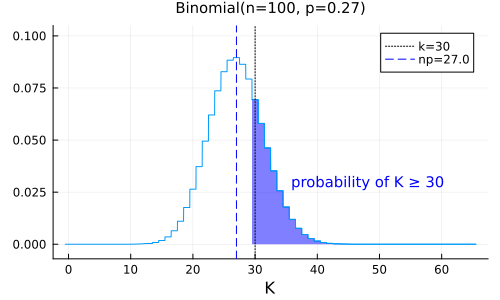

In [18]:
var"p = 0.27 は n = 100, k = 30 にそこそこ適合している"

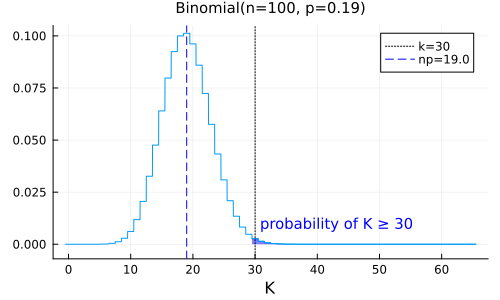

In [19]:
var"p = 0.19 は n = 100, k = 30 にあまりにも適合しない"

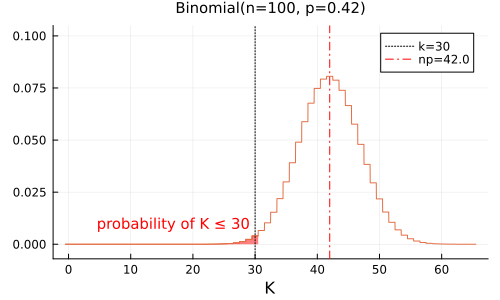

In [20]:
var"p = 0.42 は n = 100, k = 30 にあまりにも適合しない"

Clopper-Pearsonの信頼区間は具体的には以下のように計算される.

* 二項分布モデル $\op{Binomial}(n, p)$ において成功回数が $k$ 以上になる確率が $\alpha/2$ に等しくなる $p$ を求め $p_L$ と書く.
* 二項分布モデル $\op{Binomial}(n, p)$ において成功回数が $k$ 以下になる確率が $\alpha/2$ に等しくなる $p$ を求め $p_U$ と書く.
* Clopper-Pearsonの信頼区間は $[p_L, p_U]$ になる.

以下は $\alpha = 5\%$ の場合の $p_L = p\_L$ と $p_U = p\_U$ の図である.

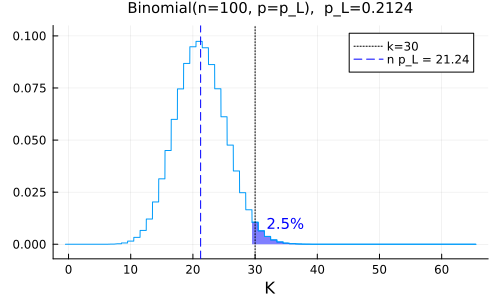

In [21]:
var"下側では p = p_L がぎりぎり" 

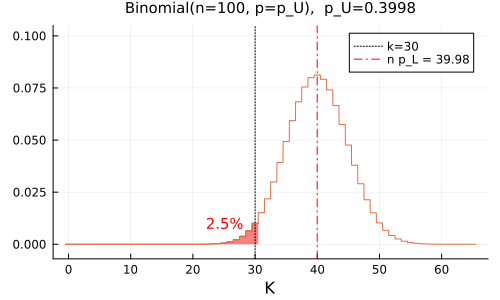

In [22]:
var"上側では p = p_U がぎりぎり"

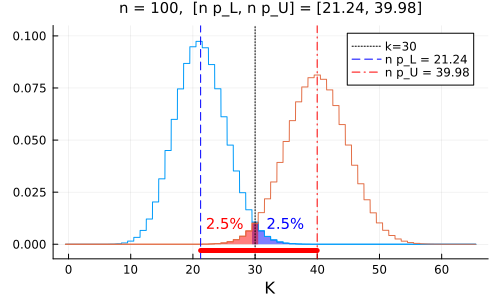

In [23]:
var"n × 95%信頼区間"

### 問題: n=100, k=30 の95%Clopper-Pearson信頼区間

「$n=100$ 回中 $k=30$ 回成功」というデータから決まる $95\%$ Clopper-Pearson信頼区間を求めよ.  (値は小数点以下第4桁まで求めよ.)

__解答例:__ データ $n=100$, $k=30$ から決まる $95\%$ Clopper-Pearson信頼区間は

$$
[0.2124, 0.3998]
$$

である.  (計算の仕方については以下を見よ.)

__解答終__

In [24]:
# n回中k回成功というデータが得られたとする
n, k = 100, 30

(100, 30)

In [25]:
# 有意水準を5%に設定 (α は \alpha TAB で入力できる)
α = 0.05

0.05

In [26]:
# 二項分布Binomial(n,p)でk以上になる確率が2.5%になるp
p_L = quantile(Beta(k, n-k+1), α/2)

0.21240642048953662

In [27]:
# 検算: 分布 Binomial(n, p_L) で k 以上になる確率
ccdf(Binomial(n, p_L), k-1)

0.025000000000000026

In [28]:
# 二項分布Binomial(n,p)でk以下になる確率が2.5%になるp
p_U = quantile(Beta(k+1, n-k), 1 - α/2)

0.39981467617980404

In [29]:
# 検算: 分布 Binomial(n, p_U) で k 以下になる確率
cdf(Binomial(n, p_U), k) # k

0.02500000000000001

In [30]:
# n回中k回成功というデータから決まるClopper-Pearsonの信頼区間
@show [p_L, p_U];

[p_L, p_U] = [0.21240642048953662, 0.39981467617980404]


In [31]:
@show round.([p_L, p_U]; digits=4);

round.([p_L, p_U]; digits = 4) = [0.2124, 0.3998]


以上で求めたClopper-Pearson信頼区間は [R](https://cran.r-project.org/) の `binom.test` の結果に一致する.

```r
> binom.test(30, 100)
```
```
	Exact binomial test

data:  30 and 100
number of successes = 30, number of trials = 100, p-value = 7.85e-05
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2124064 0.3998147
sample estimates:
probability of success 
                   0.3 
```

WolframAlphaで求めるには以下のようにすればよい.

* [quantile(BetaDistribution(30, 71), 0.025)](https://www.wolframalpha.com/input?i=quantile%28BetaDistribution%2830%2C+71%29%2C+0.025%29) → 0.212406
* [quantile(BetaDistribution(31, 70), 0.975)](https://www.wolframalpha.com/input?i=quantile%28BetaDistribution%2831%2C+70%29%2C+0.975%29) → 0.399815

### 問題: n=400, k=120 の95% Clopper-Pearson信頼区間

前節の例は「$n=100$ 回中 $k=30$ 回成功」というデータから決まる $95\%$ Clopper-Pearson信頼区間であった.

$n$ を $4$ 倍した「$n=400$ 回中 $k=120$ 回成功」というデータから決まる $95\%$ Clopper-Pearson信頼区間を求め,  $n$ を4倍すると信頼区間の幅は約半分になることを確認せよ. (値は小数点以下第4桁まで求めよ.)

__注意:__ 大雑把には, 信頼区間の幅は $\sqrt{n}$ に反比例する. 例えば, 精度を1桁上げるためには, $n$ を $100$ 倍する必要がある.

__解答例:__ データ $n=100$, $k=30$ から決まる $95\%$ Clopper-Pearson信頼区間は

$$
[0.2124, 0.3998]
$$

であった. データ $n=400$, $k=120$ から決まる $95\%$ Clopper-Pearson信頼区間は

$$
[0.2555, 0.3475]
$$

になる. 確かに幅が約半分になっているように見える.

__解答終__

In [32]:
# n回中k回成功というデータが得られたとする
n, k = 400, 120

(400, 120)

In [33]:
# 有意水準を5%に設定 (α は \alpha TAB で入力できる)
α = 0.05

0.05

In [34]:
# 二項分布Binomial(n,p)でk以上になる確率が2.5%になるp
p_L = quantile(Beta(k, n-k+1), α/2)

0.25546672809530985

In [35]:
# 検算
ccdf(Binomial(n, p_L), k-1)

0.025000000000000112

In [36]:
# 二項分布Binomial(n,p)でk以下になる確率が2.5%になるp
p_U = quantile(Beta(k+1, n-k), 1 - α/2)

0.3475218790736496

In [37]:
# 検算
cdf(Binomial(n, p_U), k)

0.025000000000000085

In [38]:
# n回中k回成功というデータから決まるClopper-Pearsonの信頼区間
@show [p_L, p_U];

[p_L, p_U] = [0.25546672809530985, 0.3475218790736496]


In [39]:
@show round.([p_L, p_U]; digits=4);

round.([p_L, p_U]; digits = 4) = [0.2555, 0.3475]


以上で求めたClopper-Pearson信頼区間は [R](https://cran.r-project.org/) の `binom.test` の結果に一致する.

```r
> binom.test(120, 400)
```
```
	Exact binomial test

data:  120 and 400
number of successes = 120, number of trials = 400, p-value = 7.666e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2554667 0.3475219
sample estimates:
probability of success 
                   0.3 
```

WolframAlphaで求めるには以下のようにすればよい.

* [quantile(BetaDistribution(120, 281), 0.025)](https://www.wolframalpha.com/input?i=quantile%28BetaDistribution%28120%2C+281%29%2C+0.025%29) → 0.255467
* [quantile(BetaDistribution(121, 280), 0.975)](https://www.wolframalpha.com/input?i=quantile%28BetaDistribution%28121%2C+280%29%2C+0.975%29) → 0.347522

In [40]:
α = 0.05
z = quantile(Normal(), 1 - α/2)

var"z_{0.025}の定義" = plot()
plot!(Normal(),  -4,  4; label="")
plot!(Normal(), -4, -z; label="", c=1, fillrange=0, fc=:red, fa=0.3)
plot!(Normal(),  z,  4; label="", c=1, fillrange=0, fc=:red, fa=0.3)
plot!([-z, -z, NaN, z, z],
    [0, pdf(Normal(), -z), NaN, 0, pdf(Normal(), z)];
    label="±z_{0.025}", c=:red)
title!("Normal(0,1)"; xtick=-4:4)
annotate!(-2.2, 0.06, text("2.5%", 10, :red, :right))
annotate!(2.2, 0.06, text("2.5%", 10, :red, :left));

## 関連の問題

以下では信頼度を $1-\alpha$ と表す($0 < \alpha < 1$ は有意水準と呼ばれる). さらに,

$$
z_{\alpha/2} = \op{quantile}(\op{Normal(0, 1)}, 1 - \alpha/2)
$$

とおく.  これは標準正規分布において $z_{\alpha/2}$ 以上になる確率が $\alpha/2$ になることを意味している.  例えば, $\alpha = 5\%$ のとき, 

$$
z_{0.025} = 1.95996{\cdots} \approx 1.96.
$$

この $1.96$ は非常に有名な数値である. 大雑把な分析で十分な場合には $2$ で代替してよい.

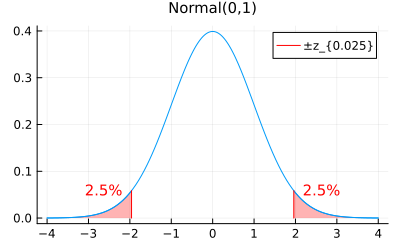

In [41]:
var"z_{0.025}の定義"

### 問題: Waldの信頼区間との比較

__Waldの信頼区間の定義:__ データ「$n$ 回中 $k$ 回成功」が得られたとする. このとき,

$$
\phat = \frac{k}{n}, \quad
\SEhat = \sqrt{\frac{\phat(1-\phat)}{n}}
$$

とおき, 

$$
\phat - z_{\alpha/2} \SEhat
\le p \le
\phat + z_{\alpha/2} \SEhat
$$

を成功確率パラメータ $p$ の信頼度 $1-\alpha$ の __Waldの信頼区間__ と呼ぶ. $95\%$ Wald信頼区間は近似的に次のように書ける:

$$
\phat - 1.96 \SEhat
\le p \le
\phat + 1.96 \SEhat.
$$

(1) データ「$n=100$ 回中 $k=30$ 回成功」の $95\%$ Wald信頼区間を求めよ.

(2) データ「$n=400$ 回中 $k=120$ 回成功」の $95\%$ Wald信頼区間を求めよ.

(3) これらの場合にWald信頼区間とClopper-Pearson信頼区間は大きくは違わないことを確認せよ.

数値は小数点以下第4桁まで求めよ.

__注意:__ Waldの信頼区間の計算はClopper-Pearsonの信頼区間と比較すると圧倒的に易しい. $k$ と $n-k$ が十分に大きければ, 実用的には計算が容易なWaldの信頼区間で用が足りることが多い.

__解答例:__ (1),(3) データ「$n=100$ 回中 $k=30$ 回成功」の $95\%$ Wald信頼区間は

$$
[0.2102, 0.3898].
$$

同じデータから決まる$95\%$ Clopper-Pearson信頼区間は

$$
[0.2124, 0.3998]
$$

確かに大きくは違わない.

(2),(3) データ「$n=400$ 回中 $k=120$ 回成功」の $95\%$ Wald信頼区間は

$$
[0.2551, 0.3449].
$$

同じデータから決まる$95\%$ Clopper-Pearson信頼区間は

$$
[0.2555, 0.3475]
$$

この2つは近似的によく一致しているように見える.

__解答終__

In [42]:
α = 0.05
z = quantile(Normal(), 1 - α/2)

1.9599639845400576

In [43]:
# (1)
n, k = 100, 30
p̂ = k/n
SE = √(p̂*(1 - p̂)/n)
p_L, p_U = p̂ - z*SE, p̂ + z*SE
@show [p_L, p_U]
@show round.([p_L, p_U]; digits=4);

[p_L, p_U] = [0.21018316681457927, 0.3898168331854207]
round.([p_L, p_U]; digits = 4) = [0.2102, 0.3898]


In [44]:
# (2)
n, k = 400, 120
p̂ = k/n
SE = √(p̂*(1 - p̂)/n)
p_L, p_U = p̂ - z*SE, p̂ + z*SE
@show [p_L, p_U]
@show round.([p_L, p_U]; digits=4);

[p_L, p_U] = [0.25509158340728966, 0.3449084165927103]
round.([p_L, p_U]; digits = 4) = [0.2551, 0.3449]


WolframAlphaで

* [quantile(NormalDistribution(0,1), 0.975)](https://www.wolframalpha.com/input?i=quantile%28NormalDistribution%280%2C1%29%2C+0.975%29)

によって, $z = 1.95996$ を得ることができれば, 後は平方根も計算できる任意の電卓ですべてを計算できる.

### Waldの信頼区間の基礎

二項分布 $\op{Binomial}(n, p)$ の期待値は $np$ で標準偏差は $\sqrt{np(1-p)}$ になる.

__二項分布の中心極限定理:__ 二項分布は正規分布で近似される:

$$
\op{Binomial}(n, p) \approx
\op{Normal}\left(np, \sqrt{np(1-p)}\right).
$$

__分散だけが少し違う正規分布による近似__: $\phat=k/n$ が $p$ に近いとき,

$$
\op{Normal}\left(np, \sqrt{np(1-p)}\right) \approx
\op{Normal}\left(np, \sqrt{n\phat(1-\phat)}\right).
$$

この2つの近似が使える状況では, 

$$
\op{Binomial}(n, p) \approx
\op{Normal}\left(np, \sqrt{n\phat(1-\phat)}\right)
$$

という近似が使えるので, 確率変数 $K$ が $\op{Binomial}(n, p)$ に従うとき,

$$
\frac{K - np}{\sqrt{n\phat(1-\phat)}} \sim
\op{Normal}(0,1), \text{approximately}
$$

という近似が使え, $\phat=k/n$, $\SEhat=\sqrt{p(1-p)/n}$ のとき

$$
\frac{k - np}{\sqrt{n\phat(1-\phat)}} =
\frac{\phat - p}{\SEhat}
$$

なので,

$$
\begin{aligned}
&
(\text{二項分布 $\op{Binomial}(n, p)$ で成功回数が $k$ 以上(以下)になる確率})
\\ & \approx
(\text{正規分布 $\op{Normal}\left(np, \sqrt{n\phat(1-\phat)}\right)$
において $k=n\phat$ 以上(以下)になる確率})
\\ & \approx
(\text{標準正規分布 $\op{Normal}(0,1)$ において $(\phat-p)\big/\SEhat$ 以上(以下)になる確率}).
\end{aligned}
$$

この確率が $\alpha/2$ に等しくなるような $p$ を $p_L$ ($p_U$)と書くと, $z_{\alpha/2} = \op{quantile}(\op{Normal}(0,1), 1-\alpha/2)$ ($\alpha=5\%$ ならば $z_{\alpha/2}\approx 1.96$)のとき, 

$$
\frac{\phat-p_L}{\SEhat} \approx z_{\alpha/2}, \quad
\frac{\phat-p_U}{\SEhat} \approx -z_{\alpha/2}
$$

という近似が成立するので,

$$
p_L \approx \phat - z_{\alpha/2} \SEhat, \quad
p_U \approx \phat + z_{\alpha/2} \SEhat.
$$

$p_L, p_U$ はClopper-Pearsonの信頼区間の両端の値なので, この近似がうまく行く場合には, Clopper-Pearsonの信頼区間とWaldの信頼区間は近似的に一致することになる. 

この近似がうまく行っていない場合には, __Waldの信頼区間は0から1の範囲をはみ出してしまうことさえある.__

### 問題: Waldの信頼区間が0～1の範囲をはみ出す場合

データ「$n=20$ 回中 $k=2$ 回成功」の $95\%$ Wald信頼区間の下限が $0$ 未満になっていることを確認せよ.

__解答例:__ データ「$n=20$ 回中 $k=2$ 回成功」の $95\%$ Wald信頼区間は

$$
[-0.0315, 0.2315]
$$

になる. 確かに下限は $0$ 未満になっている.

__解答終__

__注意:__ 対称性から, データ「$n=20$ 回中 $k=18$ 回成功」の $95\%$ Wald信頼区間の上限が $1$ より大きくなることもわかる.  一般に $k/n$ が $0$ または $1$ に非常に近いとWaldの信頼区間の精度は低くなる.

In [45]:
n, k = 20, 2
p̂ = k/n
SE = √(p̂*(1 - p̂)/n)
p_L, p_U = p̂ - z*SE, p̂ + z*SE
@show [p_L, p_U]
@show round.([p_L, p_U]; digits=4);

[p_L, p_U] = [-0.031478381086487484, 0.2314783810864875]
round.([p_L, p_U]; digits = 4) = [-0.0315, 0.2315]


### 問題: Wilsonの信頼区間との比較

__Wilsonの信頼区間の定義:__ データ「$n$ 回中 $k$ 回成功」が得られたとする. このとき,

$$
\phat = \frac{k}{n}, \quad
\SEhat = \sqrt{\frac{\phat(1-\phat)}{n}}, \quad
z = z_{\alpha/2}, \quad
a = 1 + \frac{z^2}{n}, \quad
b = \phat + \frac{z^2}{2n}, \quad
c = \phat^2
$$

とおき, $p$ に関する方程式 $ap^2-2bp+c=0$ の2つの解を $p_L < p_I$ と書くき, 

$$
p_L \le p \le p_U
$$

を成功確率パラメータ $p$ の信頼度 $1-\alpha$ の __Wilsonの信頼区間__ と呼ぶ.

$p_- = p_L$, $p_+ = p_U$ と書くと, 

$$
p_\pm = \frac{b \pm \sqrt{b^2-ac}}{a} =
\frac{1}{1+z^2/n}\left(
\phat+\frac{z^2}{2n}
\pm z\sqrt{\SEhat^2 + \frac{z^2}{4n^2}}
\right).
$$

以下の場合に, 信頼度が $95\%$ の場合の, Clopper-Pearson信頼区間, Wald信頼区間, Wilson信頼区間を求めよ.

(1) データが「$n=20$ 回中 $k=2$ 回成功」の場合.

(2) データが「$n=100$ 回中 $k=5$ 回成功」の場合.

(3) データが「$n=400$ 回中 $k=20$ 回成功」の場合.

__解答例:__ (1) データ「$n=20$ 回中 $k=2$ 回成功」ときの $95\%$ 信頼区間はそれぞれ

$$
\begin{array}{|c|c|}
\hline
\text{Clopper-Pearson} & [0.0123, 0.3170] \\
\hline
\text{Wald}            & [-0.0315, 0.2315] \\
\hline
\text{Wilson}          & [0.0279, 0.3010] \\
\hline
\end{array}
$$

(2) データ「$n=100$ 回中 $k=5$ 回成功」ときの $95\%$ 信頼区間はそれぞれ

$$
\begin{array}{|c|c|}
\hline
\text{Clopper-Pearson} & [0.0164, 0.1128] \\
\hline
\text{Wald}            & [0.0073, 0.0927] \\
\hline
\text{Wilson}          & [0.0215, 0.1118] \\
\hline
\end{array}
$$

(3) データ「$n=400$ 回中 $k=20$ 回成功」ときの $95\%$ 信頼区間はそれぞれ

$$
\begin{array}{|c|c|}
\hline
\text{Clopper-Pearson} & [0.0308, 0.0762] \\
\hline
\text{Wald}            & [0.0286, 0.0714] \\
\hline
\text{Wilson}          & [0.0326, 0.0760] \\
\hline
\end{array}
$$

In [46]:
function clopper_pearson_ci(n, k; α = 0.05)
    p_L = quantile(Beta(k, n-k+1), α/2)
    p_U = quantile(Beta(k+1, n-k), 1 - α/2)
    [p_L, p_U]
end

function zpse(n, k; α = 0.05)
    z = quantile(Normal(), 1 - α/2)
    p̂ = k/n
    SE = √(p̂ * (1 - p̂) / n)
    z, p̂, SE
end

function wald_ci(n, k; α = 0.05)
    z, p̂, SE = zpse(n, k; α)
    p_L = p̂ - z*SE
    p_U = p̂ + z*SE
    [p_L, p_U]
end

function zpseabc(n, k; α = 0.05)
    z, p̂, SE = zpse(n, k; α)
    a = 1 + z^2/n
    b = p̂ + z^2/(2n)
    c = p̂^2
    z, p̂, SE, a, b, c
end

function wilson_ci_old(n, k; α = 0.05)
    z, p̂, SE, a, b, c = zpseabc(n, k; α)
    D = b^2 - a*c
    # Solutions of a p² - 2b p + c = 0
    p_L = (b - √D)/a
    p_U = (b + √D)/a
    [p_L, p_U]
end

function wilson_ci(n, k; α = 0.05)
    z, p̂, SE, a, b, c = zpseabc(n, k; α)
    D₀ = SE^2 + z^2/(4n^2)
    # Solutions of a p² - 2b p + c = 0
    p_L = (b - z*√D₀)/a
    p_U = (b + z*√D₀)/a
    [p_L, p_U]
end

wilson_ci_old(100, 30) ≈ wilson_ci(100, 30)

true

In [47]:
function print_cis(n, k; α = 0.05)
    ci_cp = round.(clopper_pearson_ci(n, k; α); digits=4)
    ci_wald = round.(wald_ci(n, k; α); digits=4)
    ci_wilson = round.(wilson_ci(n, k; α); digits=4)
    println("Clopper-Pearson: ", ci_cp)
    println("Wald:            ", ci_wald)
    println("Wilson:          ", ci_wilson)
end

print_cis (generic function with 1 method)

In [48]:
# (1)
print_cis(20, 2)

Clopper-Pearson: [0.0123, 0.317]
Wald:            [-0.0315, 0.2315]
Wilson:          [0.0279, 0.301]


In [49]:
# (2)
print_cis(100, 5)

Clopper-Pearson: [0.0164, 0.1128]
Wald:            [0.0073, 0.0927]
Wilson:          [0.0215, 0.1118]


In [50]:
# (3)
print_cis(400, 20)

Clopper-Pearson: [0.0308, 0.0762]
Wald:            [0.0286, 0.0714]
Wilson:          [0.0326, 0.076]


### Wilsonの信頼区間の基礎

Waldの信頼区間では「分散だけが少し違う正規分布による近似」を使っていた.  しかし, その近似を避けて, 二項分布の中心極限定理による近似

$$
\op{Binomial}(n, p) \approx
\op{Normal}\left(np, \sqrt{np(1-p)}\right)
$$

だけで, Clopper-Pearsonの信頼区間の近似を構成できる. それがWilsonの信頼区間である.

二項分布の中心極限定理による近似だけを用いると, 確率変数 $K$ が $\op{Binomial}(n, p)$ に従うとき,

$$
\frac{K - np}{\sqrt{np(1-p)}} \sim
\op{Normal}(0,1), \text{approximately}.
$$

Waldの信頼区間の構成ではこの式の平方根の内側の $p$ が $\phat=k/n$ になっていた. このとき,

$$
\frac{k - np}{\sqrt{np(1-p)}} =
\frac{\phat - p}{\sqrt{p(1-p)/n}}
$$

なので,

$$
\begin{aligned}
&
(\text{二項分布 $\op{Binomial}(n, p)$ で成功回数が $k$ 以上(以下)になる確率})
\\ & \approx
(\text{正規分布 $\op{Normal}\left(np, \sqrt{np(1-p)}\right)$
において $k=n\phat$ 以上(以下)になる確率})
\\ & \approx
(\text{標準正規分布 $\op{Normal}(0,1)$ において $(\phat-p)\Big/\!\sqrt{p(1-p)/n}$ 以上(以下)になる確率}).
\end{aligned}
$$

この確率が $\alpha/2$ に等しくなるような $p$ を $p_L$ ($p_U$)と書くと, $z = z_{\alpha/2} = \op{quantile}(\op{Normal}(0,1), 1-\alpha/2)$ ($\alpha=5\%$ ならば $z = z_{\alpha/2}\approx 1.96$)のとき, 

$$
\frac{\phat-p_L}{\sqrt{p(1-p)/n}} \approx z \quad
\left( \frac{\phat-p_U}{\sqrt{p(1-p)/n}} \approx -z \right)
$$

という近似が成立する. これはClopper-Pearsonの信頼区間の両端の値 $p_L, p_U$ が $p$ に関する次の方程式の近似解になっていることを意味している:

$$
\frac{(\phat-p)^2}{p(1-p)/n} = z^2.
$$

この方程式は次の2次方程式に書き直される:

$$
\left(1 + \frac{z^2}{n}\right)p^2 -
2\left(\phat + \frac{z^2}{2n}\right)p + \phat^2 = 0.
$$

Wilsonの信頼区間の定義はこの2次方程式の2つの解で挟まれた区間になっている. 実際, 

$$
a = 1 + \frac{z^2}{n}, \quad
b = \phat + \frac{z^2}{2n}, \quad
c = \phat^2, \quad
f(p)=ap^2-2bp+c
$$

とおくと, $0\le\phat\le 1$ であることより,

$$
f(0) = \phat^2 \ge 0, \quad
f(1) = (1-\phat)^2 \ge 0, \quad
0 \le \frac{b}{a} = \frac{\phat^2+z^2/(2n)}{1+z^2/n} \le 1 
$$

でかつ

$$
\begin{aligned}
b^2 - ac &=
\phat^2 + \frac{z^2}{n}\phat + \frac{z^4}{4n^2} - \phat^2 - \frac{z^2}{n}\phat
\\ &=
\frac{z^2}{n}\phat(1-\phat) + \frac{z^4}{4n^2} =
z^2\left(\SEhat^2 + \frac{z^2}{4n^2}\right) \ge 0
\end{aligned}
$$

なので, $f(p)=ap^2-2bp+c=0$ の2つの解はどちらも $0$ 以上 $1$ の範囲に含まれ,

$$
p_\pm = \frac{b \pm \sqrt{b^2-ac}}{a} =
\frac{1}{1+z^2/n}\left(
\phat+\frac{z^2}{2n} \pm z\sqrt{
\SEhat^2 + \frac{z^2}{4n^2}
}
\right)
$$

と表される.

### Sterneの信頼区間について

以上ではClopper-Pearsonの信頼区間, Waldの信頼区間, Wilsonの信頼区間の二項分布モデルにおける信頼区間について説明した.  これ以外にも多数の信頼区間の定義がある. それら3つ以外の信頼区間として基本的なのは __Sterneの信頼区間__ である. 

Sterneの信頼区間を与えるP値函数に関する解説が「[標本分布について](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/04%20Distribution%20of%20samples.ipynb)」のノートの「Sterneの信頼区間とそれを与えるP値函数」の節にある.

### 問題: Poisson分布とガンマ分布の関係

$\lambda > 0$ のとき, 公式

$$
\sum_{i\ge k} \binom{n}{i} p^i (1-p)^{n-i} =
\frac{\int_0^p t^{k-1} (1-t)^{n-i}\,dt}{B(k, n-k+1)}
$$

において, $p = \lambda/n$ とおき, $t = x/n$ とおき, $n\to\infty$ の極限を取ることによって次の公式が得られることを示せ:

$$
e^{-\lambda}\sum_{i\ge k} \frac{\lambda^i}{i!} =
\frac{\int_0^\lambda e^{-x} x^{k-1} \,dx}{\Gamma(k)}.
$$

これは次が成立することを意味している:

$$
\begin{aligned}
&
(\text{Poisson分布 $\op{Poisson}(\lambda)$ において $k$ 以上になる確率})
\\ &=
(\text{ガンマ分布 $\op{Gamma}(k,1)$ において $\lambda$ 以下になる確率}).
\end{aligned}
$$

__注意:__ この結果は

* 単位時間のあいだに平均して $1$ 回起こるイベントが時間 $\lambda$ のあいだに起こる回数が $k$ 以上になる確率

と次が等しいことを意味している:

* 単位時間のあいだに平均して $1$ 回起こるイベントが $k$ 回起こるまでにかかる時間が $\lambda$ 以下の確率.

__注意:__ 意味的には, ガンマ分布に収束するのは負の二項分布である.  ベータ分布は負の二項分布とも関係がある.  それを使えば負の二項分布を使っても同様の結果を得ることができる.

__解答例:__ $p=\lambda/n$ とおき, $n\to\infty$ とすると,

$$
\begin{aligned}
\binom{n}{i} p^i (1-p)^{n-i} &=
\frac{n(n-1)\cdots(n-i+1)}{i!}
\frac{\lambda^i}{n^i}\left(1-\frac{\lambda}{n}\right)^{n-i}
\\ &=
\underbrace{\frac{n(n-1)\cdots(n-i+1)}{n^i}}_{\to 1}
\underbrace{\left(1-\frac{\lambda}{n}\right)^{n-i}}_{\to \exp(-\lambda)}
\frac{\lambda^i}{i!}
\to e^{-\lambda} \frac{\lambda^i}{i!}
\end{aligned}
$$

なので,

$$
\sum_{i\ge k} \binom{n}{i} p^i (1-p)^{n-i}
\to e^{-\lambda} \sum_{i\ge k} \frac{\lambda^i}{i!}.
$$

$t = x/n$ とおき, $n\to\infty$ とすると,

$$
\begin{aligned}
&
n^k B(k, n-k+1) \to \Gamma(k),
\\ &
n^k \int_0^p t^{k-1} (1-t)^{n-i}\,dt =
\int_0^\lambda x^{k-1} \left(1-\frac{x}{n}\right)^{n-i}\,dt \to
\int_0^\lambda e^{-x} x^{k-1} \,dx
\end{aligned}
$$

となることより,

$$
\frac{\int_0^p t^{k-1} (1-t)^{n-i}\,dt}{B(k, n-k+1)} =
\frac{n^k\int_0^p t^{k-1} (1-t)^{n-i}\,dt}{n^k B(k, n-k+1)} \to
\frac{\int_0^\lambda e^{-x} x^{k-1} \,dx}{\Gamma(k)}.
$$

__解答終__

## おまけ: 二項分布モデルのBayes統計との関係

このノート群ではBayes統計に深く触れるつもりはない. 

しかし, 興味がある人は多いと思われるので, 二項分布モデルの場合のBayes統計について簡単に説明しておくことにする.

### 二項分布モデルのBayes統計

二項分布モデル $\op{Binomial}(n, p)$ とパラメータ $p$ に関する確率密度函数 $\varphi(p)$ ($0\le p\le 1$)の組をモデルとして採用していると仮定する.  すなわち, このモデルは離散変数 $k$ と連続変数 $p$ に関する確率分布を記述する次の函数で与えられていると考えることができる:

$$
P(k,p|n) = \binom{n}{k}p^k(1-p)^{n-k}\varphi(p) \quad (k=0,1,2,\ldots,\; 0\le p \le 1).
$$

この $P(k,p|n)$ の値は $0$ 以上であり,

$$
\sum_{k=0}^n P(k,p|n) = \varphi(p), \quad
\int_0^1\left(\sum_{k=0}^n P(k,p|n)\right)dp = \int_0^1 \varphi(p)\,dp = 1
$$

を満たしている.

「$n$ 回中 $k$ 回成功」というデータが得られたとき, データと同じ数値がモデル内で生成されたという条件が定める条件付き確率分布を考えることが __Bayes法__ の基本である(Bayesの定理やBayesルールのような用語を持ち出す必要はない).  
この場合には $p$ に関する条件付き確率分布を考える. その確率密度函数を $\varphi(p|n,k)$ と書くと, 

$$
\begin{aligned}
&
P(k|n) = \int_0^1 P(k,p|n)\,dp =
\int_0^1 \binom{n}{k}p^k(1-p)^{n-k}\varphi(p)\,dp,
\\ &
\varphi(p|n,k) = \frac{P(k,p|n)}{P(k|n)} =
\frac{\binom{n}{k}p^k(1-p)^{n-k}\varphi(p)}{\int_0^1 \binom{n}{k}p^k(1-p)^{n-k}\varphi(p)\,dp} =
\frac{p^k(1-p)^{n-k}\varphi(p)}{\int_0^1 p^k(1-p)^{n-k}\varphi(p)\,dp}.
\end{aligned}
$$

$\varphi(p)$ は __事前分布__ (prioir)と呼ばれ, $\varphi(p|n,k)$ はデータ「$n$ 回中 $k$ 回成功」に関する __事後分布__ (posterior)と呼ばれる.

### 事前分布が共役事前分布(ベータ分布)の場合

この場合には, 事前分布としてベータ分布 $\op{Beta}(a, b)$ を採用すると計算が著しく易しくなる. 以下では事前分布は $\op{Beta}(a, b)$ であると仮定する:

$$
\varphi(p) = \frac{p^{a-1}(1-p)^{b-1}}{B(a,b)}.
$$

このとき,

$$
\begin{aligned}
&
p^k(1-p)^{n-k}\varphi(p) = p^{a+k-1}(1-p)^{b+n-k-1}, 
\\ &
\int_0^1 p^k(1-p)^{n-k}\varphi(p)\,dp = B(a+k, b+n-k)
\end{aligned}
$$

なのでデータ「$n$ 回中 $k$ 回成功」に関する事後分布は次の形になる:

$$
\varphi(p|n,k) = \frac{p^{a+k-1}(1-p)^{b+n-k-1}}{B(a+k, b+n-k)}.
$$

つまり, 事後分布は $\op{Beta}(a+k, b+n-k)$ になる.

ベータ分布 $\op{Beta}(\alpha, \beta)$ は $\alpha, \beta$ が大きなとき, $p=\alpha/(\alpha+\beta)$ の周囲に集中した分布になる.

ゆえに, 事後分布は $\op{Beta}(a+k, b+n-k)$ は $a+k$ と $b+n-k$ が大きいならば $p=(a+k)/(a+b+n)$ の周囲に集中した分布になり, $k,n-k$ が $a,b$ よりも十分に大きいならば $p=k/n$ に集中した分布になり,  最尤法と同じ結果が得られる.

In [51]:
function plot_beta(a, b; label="", title="Beta($a, $b)", kwargs...)
    if (a == 0 && b > 0) || (a > 0 && b == 0)
        plot(x -> x^(a-1)*(1-x)^(b-1), 0, 1; ylim=(-0.5, 10.0), label, kwargs...)
    else
        beta = Beta(a, b)
        if a == 1 && b == 1
            plot(beta, 0, 1; ylim=(-0.07, 1.4), label, kwargs...)
        elseif a ≥ 1 && b ≥ 1
            plot(beta, 0, 1; label, kwargs...)
        else
            plot(beta, 0, 1; ylim=(-0.5, 10.0), label, kwargs...)
        end
    end
    plot!(; xtick=0:0.1:1)
    title!(title)
end

function plot_betas(a, b, n, k)
    P0 = plot_beta(a, b)
    P1 = plot_beta(a+k, b+n-k)
    P2 = plot_beta(a+100k, b+100(n-k))
    plot(P0, P1, P2; size=(800, 180), layout=(1, 3))
    plot!(; tickfontsize=6)
end

plot_betas (generic function with 1 method)

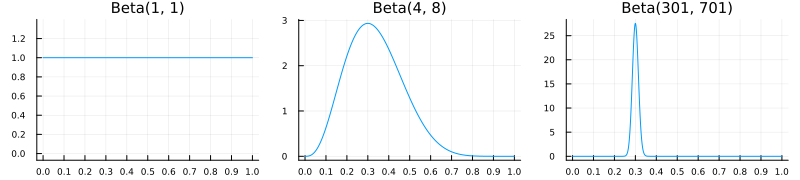

In [52]:
# 一様事前分布の場合
plot_betas(1, 1, 10, 3)

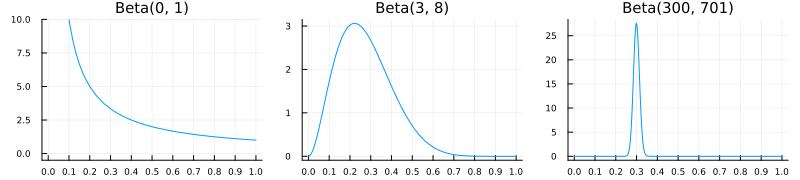

In [53]:
# 非対称なimproper事前分布の場合
plot_betas(0, 1, 10, 3)

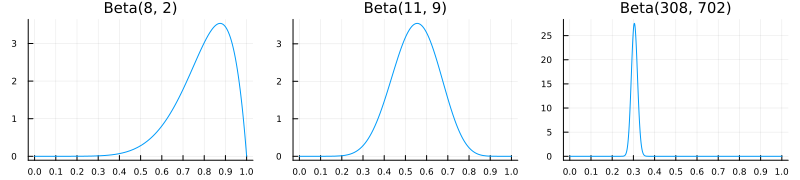

In [54]:
# 偏った事前分布の場合
plot_betas(8, 2, 10, 3)

### 二項分布モデルでの片側P値のBayes統計での解釈

事前分布無しの試行回数 $n$ の二項分布モデルにおける仮説「成功確率 $p$ は $p_0$ 以下である」のデータ「$n$ 回中 $k$ 回成功」に関する片側検定のP値を二項分布 $\op{Bionmial}(n, p_0)$ において成功回数が $k$ 以上になる確率と定義し, $\op{pvalue}(k|n, p\le p_0)$ と書くことにする.  それは, ベータ分布 $\op{Beta}(k,n-k+1)$ において $p_0$ 以下になる確率に等しいのであった:

$$
\op{pvalue}(k|n, p\le p_0) =
\sum_{i\ge k}\binom{n}{i}p_0^i(1-p_0)^{n-i} =
\frac{\int_0^{p_0} p^{k-1}(1-p)^{n-k}}{B(k, n-k+1)}.
$$

これは形式的には, 成功確率 $p$ に関する事前分布が $\op{Beta}(0,1)$ のときの, 事後分布 $\op{Beta}(k, n-k+1)$ において仮説「成功確率 $p$ は $p_0$ 以下である」が成立する確率に一致する. すなわち, この場合には

* 仮説「成功確率 $p$ は $p_0$ 以下である」のP値

と

* Bayes統計における事後分布で仮説「成功確率 $p$ は $p_0$ 以下である」が成立する確率

がぴったり一致していることになる.

ただし, ベータ分布 $\op{Beta}(\alpha,\beta)$ は $\alpha$ も $\beta$ も正の場合にのみ定義されているので, 事前分布として $\op{Beta}(0,1)$ を採用することは形式的である.  このような場合に事前分布 $\op{Beta}(0,1)$ はimproperであるという.

しかし, 事前分布が $\op{Beta}(a,b)$ のとき, $k,n-k$ が $a,b$ よりも十分に大きければ, 事後分布 $\op{Beta}(a+k, b+n-k)$ はほとんど $a,b$ に依存しなくなる.  ゆえに, improper事前分布 $\op{Beta}(0,1)$ を例えば一様事前分布 $\op{Beta}(1,1)$ やJeffreys事前分布 $\op{Beta}(1/2,1/2)$ に取り換えても, 上の場合のP値とBayes統計での事後分布における確率の一致は近似的に成立することになる.

この意味で, $k,n-k$ が十分大きな場合にはBayes統計の結果と通常のP値を使った統計分析の結果は実践的な違いを生まない.

__注意:__ だから, 二項分布モデル(やBernoulli試行モデル)の場合を例に使って, P値よりもBayes統計を使うべきだと安易に主張している文献を読むときにはその主張を疑いながら読む必要がある.

__注意:__ 上のようなデータサイズが大きい場合の(近似的)一致は, 正則モデルと呼ばれる「単純な」モデルで広く成立している.  

__注意:__ 事前分布が大きく偏っている場合には, その分だけデータサイズをさらに大きくしないと, 上のような近似的な一致は得られない.  しかし, 偏りの小さい「おとなしめ」の事前分布が採用されている場合には, それほど大きなデータサイズでなくても, 近似的な一致が成立している可能性が高い.

### Pólyaの壺との関係

事前分布 $\varphi(p)$ と二項分布 $\op{Binomial}(n, p)$ の組で構成されたBayes統計のモデル内における成功回数 $k$ の分布の確率質量函数は

$$
P(k|n) = \int_0^1 P(k,p|n)\,dp =
\int_0^1 \binom{n}{k}p^k(1-p)^{n-k}\varphi(p)\,dp
$$

になるのであった.  事前分布が $\op{Beta}(a,b)$ のとき, これは以下のようになる:

$$
P(k|n) =
\int_0^1 \binom{n}{k}p^k(1-p)^{n-k}\frac{p^{a-1}(1-p)^{b-1}}{B(a,b)}\,dp =
\binom{n}{k}\frac{B(a+k, b+n-k)}{B(a,b)}.
$$

さらにこれは, $\Gamma(\alpha)\Gamma(\beta)=\Gamma(\alpha+\beta)B(\alpha,\beta)$ や $\Gamma(x+k)=x(x+1)\cdots(x+k-1)\Gamma(x)$ ($k=0,1,2,\ldots$)を使うと,

$$
P(k|n) =
\binom{n}{k}\frac{a(a+1)\cdots(a+k-1)\cdot b(b+1)\cdots(b+n-k-1)}{(a+b)(a+b+1)\cdots(a+b+n-1)}
$$

と書き直される.  これは, 最初に壺の中に赤い玉が $a$ 個と白い玉が $b$ 個入っているときに, そこから無作為に玉を取り出して, その色を記録し, 取り出された玉と同じ色の玉を壺に2個返すことを $n$ 回繰り返したときに, 赤い玉が全部で $k$ 回取り出される確率に一致する($n=5$ の場合に色々な例を考えてみよ, 仕組みはすぐにわかる).  ただし, この解釈は $a,b$ がともに整数の場合にのみ成立するが, 上の式は $a,b$ が整数でなくても確率質量函数を与える.  この解釈を __Pólyaの壺__ (Pólya's urn) による解釈と呼ぶ.

$k$ の分布の

$$
P(k|n) =
\int_0^1 \binom{n}{k}p^k(1-p)^{n-k}\varphi(p)\,dp
$$

という表示は, $k$ が次のようにランダムに決まっているという解釈を与える:

(B) 最初に事前分布 $\varphi(p)$ によって一定の成功確率 $p$ をランダムに決定し, その後はその成功確率 $p$ のBernoulli試行を $n$ 回行って, 成功回数を $k$ とする.

この解釈は「最初に "才能" $p$ がランダムに決まっている」と要約することができるだろう.

それに対して, Pólyaの壺の解釈は $k$ が次のようにランダムに決まっているという解釈を与える:

(P) 最初に壺の中には赤い玉が $a$ 個と白い玉 $b$ 個が入っている.  その後, 赤い玉が壺から取り出されれば壺の中の赤い玉の個数は1個増え, 白い玉についても同様である.  そのような試行を $n$ 回繰り返したときに赤い玉が出た回数 $k$ とする.

赤い玉を「成功」とみなすと, この解釈は「最初の才能 $a,b$ は誰もが一定だが, 成功すればするほど成功し易くなり, 失敗すればするほど失敗し易くなる」と要約することができるだろう.  Pólyaの壺の試行は「富める者はさらに富み、貧しい者はさらに貧しくなる」と要約されることがある.

以上の(B)と(P)では話が全然違っている.  (B)と(P)が与える確率分布が等しいという数学的結果は, 生まれ付きの才能で $k$ がランダムに決まっているのか, それとも「富める者はさらに富み、貧しい者はさらに貧しくなる」という仕組みが働いて最終的に差がついたのかが, 成功回数 $k$ を観察しただけではわからないことを意味している.

__注意:__ 以上の話題については, 「[大数の法則と中心極限定理](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/05%20Central%20limit%20theorem.ipynb)」のノートの「大数の法則が成立しない場合: Pólyaの壺」の節での「pがベータ分布に従ってランダムに決まっているベルヌーイ試行」と「富むものがさらに富み, 貧しいものがさらに貧しくなるポリアの壺試行」に関するグラフのプロットも参照せよ.  Pólyaの壺については「[確率分布達の解釈](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/03%20Interpretation%20of%20probability%20distributions.ipynb#%E7%A2%BA%E7%8E%87%E5%88%86%E5%B8%83%E9%81%94%E3%81%AE%E8%A7%A3%E9%87%88)」のノートの「ベータ負の二項分布の解釈 (Pólyaの壺)」の節も参照せよ.